In [1]:
from methods.ManiGPClassifier import ManiGPClassifier

In [2]:
from read_file import read_file

In [3]:
X, y, label_names = read_file('appendicitis.tsv')

In [4]:
X.head()

,0,1,2,3,4,5,6
0,-0.766284,-0.844828,-0.877095,-0.592292,-0.636620,0.019589,-0.713568
1,0.172414,-0.155172,0.094972,-0.141988,-0.061972,-0.011753,0.154774
2,-1.191571,-1.000000,-1.234637,-0.365112,-0.512676,-0.932419,-1.252261
3,-0.865900,-2.387931,-1.256983,-0.365112,-0.473239,-2.393732,-1.256281
4,-0.678161,0.232759,-0.571695,-0.141988,-0.264789,0.047013,-0.629146


In [5]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [6]:
label_names

array(['At1', 'At2', 'At3', 'At4', 'At5', 'At6', 'At7'], dtype='<U3')

In [7]:
manigpclf = ManiGPClassifier(n_iter=100, fitness_function="kmeans",pop_size=100, n_components=3)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        train_size=0.75,
                                                        test_size=0.25,
                                                        stratify=y,
                                                        random_state=None)

In [10]:
manigpclf.fit(X_train, y_train)

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:442: RuntimeWarning: overflow encountered in square
  max_iter=max_iter, verbose=verbose)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:442: Run

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\numpy\core\_methods.py:121: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value encountered in add
  distances += XX
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\metrics\pairwise.py:274: RuntimeWarning: invalid value en

c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
c:\users\franek\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\k_means_.py:969: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  retu

In [11]:
from operator import attrgetter
get_height = lambda tree : attrgetter('height')(tree)
str(manigpclf.model[0]), str(manigpclf.model[1]), str(manigpclf.model[-1]), get_height(manigpclf.model[0]), get_height(manigpclf.model[1]), get_height(manigpclf.model[-1])

('addition(factorial(max(1.0, x2)), x0)',
 'modulus(1.0, lt(subtract(safediv(x4, x4), xor(x1, x6)), safediv(31.98566122210962, x5)))',
 'lt(logAofB(x3, x1), max(factorial(x4), logAofB(x5, left(x2, x0))))',
 3,
 4,
 4)

In [12]:
X_train_reduced = manigpclf.reduce(manigpclf.model, X_train)

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [14]:
def plot(X, y): # 2 classes only
    if (len(X.shape) != 2 or X.shape[1] != 2):
        return
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.legend()

def plot3classes(X,y):
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], s=2**6, c='r', alpha=0.33, label='0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], c='b', marker='^', alpha=0.33, label='1')
    plt.scatter(X[y==2][:, 0], X[y==2][:, 1], c='g', marker='d', alpha=0.33, label='2')
    plt.legend()

def plot3d(X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[y==0][:, 0], X[y==0][:, 1], X[y==0][:, 2], s=2**6, c='r', alpha=0.33, label='0')
    ax.scatter(X[y==1][:, 0], X[y==1][:, 1], X[y==1][:, 2], c='b', marker='^', alpha=0.33, label='1')
    plt.legend()

In [15]:
%matplotlib inline

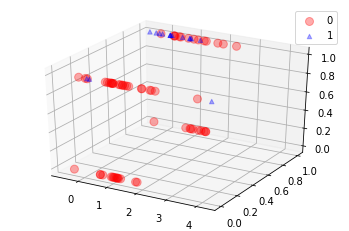

In [16]:
plot3d(X_train_reduced, y_train)

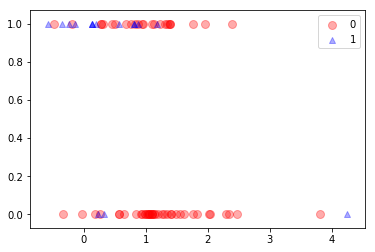

In [17]:
plot(X_train_reduced[:, :2], y_train)

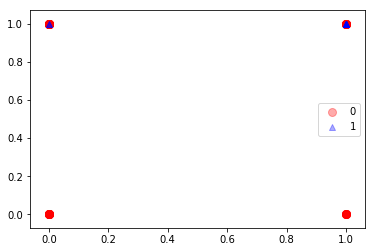

In [18]:
plot(X_train_reduced[:, 1:], y_train)

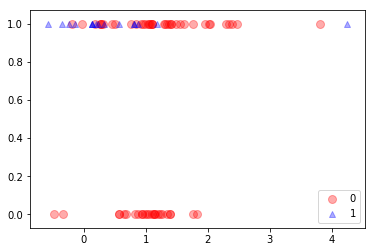

In [19]:
plot(X_train_reduced[:, [0,-1]], y_train)

In [20]:
manigpclf.evaluate(manigpclf.model, X_train, y_train, manigpclf.random_state)

0.8258928571428572

In [21]:
#-------------------------------------------------

In [22]:
X_test_reduced = manigpclf.reduce(manigpclf.model, X_test)

In [23]:
plot(X_test_reduced, y_test)

In [24]:
from utils.metrics import balanced_accuracy_score

In [25]:
balanced_accuracy_score(y_test, manigpclf.predict(X_test))

0.7954545454545454

In [26]:
manigpclf.rejected

5949

In [27]:
manigpclf.mut_count

9575

In [28]:
manigpclf.cx_count

486

In [29]:
y_test_pred = manigpclf.predict(X_test)

In [30]:
merged = list(zip(y_test, y_test_pred))

In [33]:
from random import shuffle

In [34]:
shuffle(merged)

In [35]:
y_test, y_test_pred = zip(*merged)

In [36]:
balanced_accuracy_score(y_test, y_test_pred)

0.5